In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]

matplotlib version: 3.3.3
pandas version: 1.1.4
numpy version: 1.19.4
seaborn version: 0.11.0


In [2]:
root_path = '../2-Run1'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb7', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff03.r1', 'ff14SB']  # The name of the state directories
prots = ['E4K43', 'K4E43']

filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    for igb in igbs:
    #igbff_all = []
        for prot in prots:
            direc=igb + '_'+ ff + '_'+ prot
            # For each system and state, grab all the data files that match the glob
            file_glob = os.path.join(root_path, direc, filename_pattern)
            files = glob.glob(file_glob)
            for f in files:
                # Read each into a file to be put into a dict
                df = pd.read_csv(f, sep=r'\s+', skiprows=2501, names=['Frame', 'Fraction helicity'])
                df[r'Time ($\mu$s)'] = (df['Frame']-2501)/10000
                df['Helicity (%)'] = df['Fraction helicity']*100*29/27
#                 df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
#                 df['Mouving std']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).std()
#                 df['av-std']=df['Mouving average']-df['Mouving std']
#                 df['av+std']=df['Mouving average']+df['Mouving std']
                df['igb'] = igb
                df['ff'] = ff
                df['Peptide'] = prot
                df['igbff'] = '{0} {1}'.format(ff, igb)
                df['igbffprot'] = '{0} {1} {2}'.format(ff, igb, prot)
                igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)   igb       ff  \
0   2501              0.724         0.0000     77.762963  igb1  ff03.r1   
1   2502              0.655         0.0001     70.351852  igb1  ff03.r1   
2   2503              0.552         0.0002     59.288889  igb1  ff03.r1   
3   2504              0.759         0.0003     81.522222  igb1  ff03.r1   
4   2505              0.759         0.0004     81.522222  igb1  ff03.r1   

  Peptide         igbff           igbffprot  
0   E4K43  ff03.r1 igb1  ff03.r1 igb1 E4K43  
1   E4K43  ff03.r1 igb1  ff03.r1 igb1 E4K43  
2   E4K43  ff03.r1 igb1  ff03.r1 igb1 E4K43  
3   E4K43  ff03.r1 igb1  ff03.r1 igb1 E4K43  
4   E4K43  ff03.r1 igb1  ff03.r1 igb1 E4K43  


In [3]:
89.7*29/27

96.34444444444445

In [4]:
df_1ns=df_total.iloc[::10]
df_1ns['Mouving average']=pd.Series.rolling(df_1ns['Helicity (%)'],window=50,center=False).mean()
df_1ns['Mouving std']=pd.Series.rolling(df_1ns['Helicity (%)'],window=50,center=False).std()
df_1ns['av-std']=df_1ns['Mouving average']-df_1ns['Mouving std']
df_1ns['av+std']=df_1ns['Mouving average']+df_1ns['Mouving std']

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

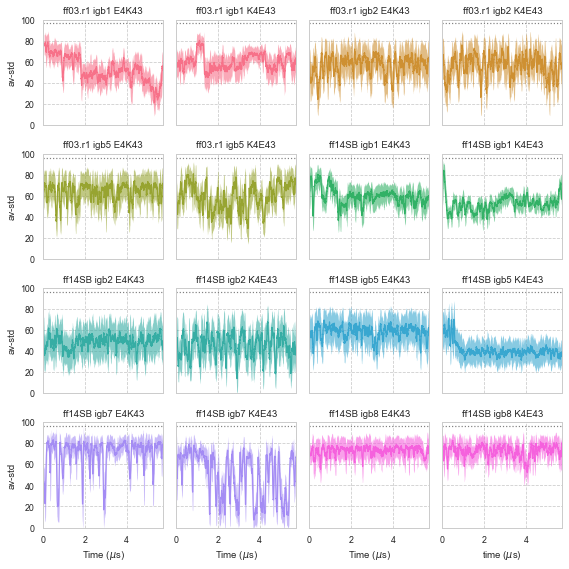

In [4]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("viridis"), font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_1ns, col="igbffprot", col_wrap=4, hue="igbff", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.34, ls=":", c=".5") # 85.7*21/19

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.fill_between, r'Time ($\mu$s)','av-std', 'av+std', alpha=0.6, lw=0).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
plt.savefig('./plots/helicity_ts_av_sd.pdf')
plt.savefig('./plots/helicity_ts_av_sd.png', dpi=300)
plt.show()

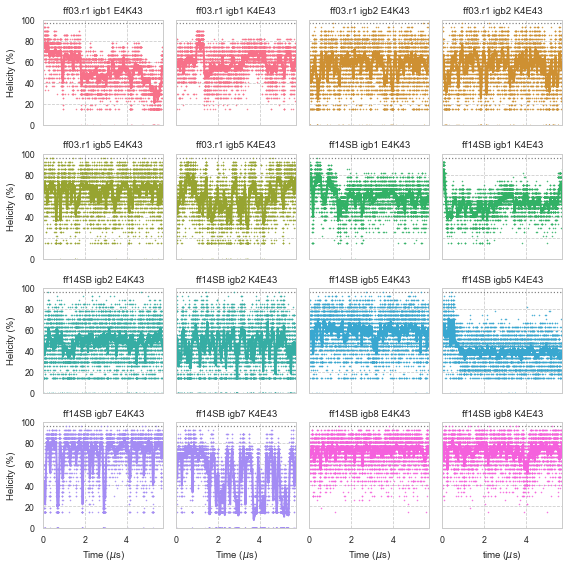

In [10]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("viridis"), font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_1ns, col="igbffprot", col_wrap=4, hue="igbff", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.34, ls=":", c=".5") # 85.7*21/19

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average', lw=2).set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=1, ls='',ms=1, marker='.').set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
plt.savefig('./plots/helicity_ts_av_data.pdf')
plt.savefig('./plots/helicity_ts_av_data.png', dpi=600)
plt.show()

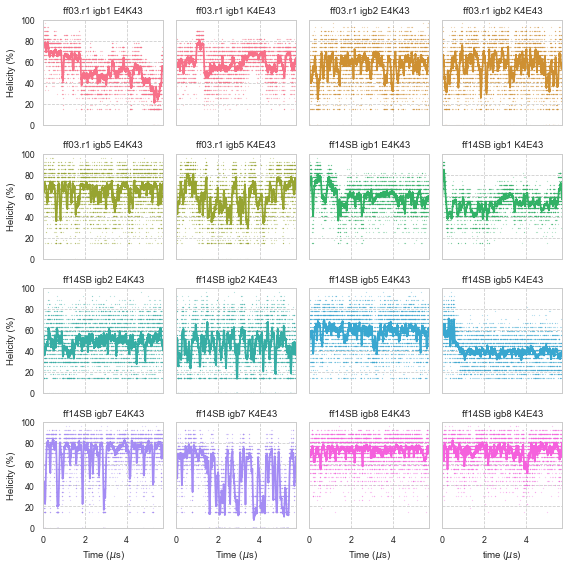

In [9]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("viridis"), font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_1ns, col="igbffprot", col_wrap=4, hue="igbff", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
# grid.map(plt.axhline, y=96.34, ls=":", c=".5") # 85.7*21/19

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average', lw=1.75).set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=1, ls='',ms=0.25, marker='.').set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
plt.savefig('./plots/helicity_ts_av_data2.pdf')
plt.savefig('./plots/helicity_ts_av_data2.png', dpi=600)
plt.show()

In [10]:
df_1ns.groupby('igbffprot')['Helicity (%)'].median()

igbffprot
ff03.r1 igb1 E4K43    51.877778
ff03.r1 igb1 K4E43    62.940741
ff03.r1 igb2 E4K43    59.288889
ff03.r1 igb2 K4E43    59.288889
ff03.r1 igb5 E4K43    66.700000
ff03.r1 igb5 K4E43    59.288889
ff14SB igb1 E4K43     62.940741
ff14SB igb1 K4E43     51.877778
ff14SB igb2 E4K43     48.118519
ff14SB igb2 K4E43     48.118519
ff14SB igb5 E4K43     59.288889
ff14SB igb5 K4E43     40.707407
ff14SB igb7 E4K43     77.762963
ff14SB igb7 K4E43     55.529630
ff14SB igb8 E4K43     74.111111
ff14SB igb8 K4E43     74.111111
Name: Helicity (%), dtype: float64

In [11]:
df_1ns.groupby(['igbff','Peptide'])['Helicity (%)'].median()

igbff         Peptide
ff03.r1 igb1  E4K43      51.877778
              K4E43      62.940741
ff03.r1 igb2  E4K43      59.288889
              K4E43      59.288889
ff03.r1 igb5  E4K43      66.700000
              K4E43      59.288889
ff14SB igb1   E4K43      62.940741
              K4E43      51.877778
ff14SB igb2   E4K43      48.118519
              K4E43      48.118519
ff14SB igb5   E4K43      59.288889
              K4E43      40.707407
ff14SB igb7   E4K43      77.762963
              K4E43      55.529630
ff14SB igb8   E4K43      74.111111
              K4E43      74.111111
Name: Helicity (%), dtype: float64

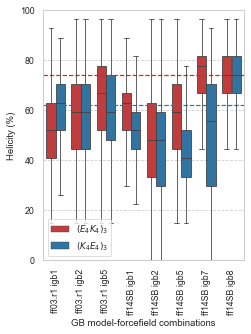

In [10]:
# sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
#         font_scale=0.95, rc={'grid.linestyle': '--'}, color_codes=False)
mycolors=["tab:red", "tab:blue"]


sns.set(context='paper', style='whitegrid', palette=sns.color_palette(mycolors), font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'}, color_codes=False)

fig, axes = plt.subplots(figsize=(3.6, 4.6))
# fig, axes = plt.subplots()
plt.axhline(y=74, ls="--", c='tab:red', alpha=1 )
plt.axhline(y=62, ls="--", c='tab:blue', alpha=1 )

ax=sns.boxplot(x='igbff', y='Helicity (%)', hue='Peptide', data=df_1ns, fliersize=0, linewidth=0.8,
               showmeans=False,
               dodge=True, width=0.75,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('GB model-forcefield combinations')

handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles, ["$(E_4K_4)_3$", "$(K_4E_4)_3$"], loc='lower left') # Associate manually the artists to a label.

#plt.axhline(y=96.34, ls=":", c=".5" ) 

# plt.tight_layout()
#plt.savefig('./helicity_boxplot.pdf', dpi=600)
#plt.legend(loc='lower left')
plt.savefig('./plots/helicity_boxplot.png', dpi=300, bbox_inches="tight")
plt.savefig('./plots/helicity_boxplot.pdf', bbox_inches="tight")